In [1]:
!nvidia-smi

Thu Dec 15 22:15:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.72       Driver Version: 512.72       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8    10W /  N/A |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))
print("1.",tf.test.is_gpu_available)
print("2",tf.test.gpu_device_name)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# sess = tf.compat.v1.Session(config=tf.ConfigProto(log_device_placement=True))


Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1. <function is_gpu_available at 0x000002E69DEE5C18>
2 <function gpu_device_name at 0x000002E69DEE40D8>
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16776320256518880153
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3665166336
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8821215372503104402
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


!pip install opencv-python

In [3]:
import numpy as np 
import pandas as pd
import cv2
import os

from matplotlib import pyplot as plt

# Image Extraction
    - Folder:
        1. Anger
        2. Contempt
        3. Disgust
        4. Fear
        5. Happy
        6. Sadness
        7. Surprise 

In [4]:
data_loc = 'Dataset/CK+48'
data_dir = os.listdir(data_loc)
print(data_dir)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']


In [5]:
image_list_arr = []
OTSU_scale_img = []
TRIANGLE_scale_img = []
for emotion_dirs in data_dir:
    emotions = os.listdir(data_loc+'/'+emotion_dirs)
#     print("emotions",emotions)
    for images in emotions:
        img_read = cv2.imread(data_loc+'/'+emotion_dirs+'/'+images)
        img_read_resize = cv2.resize(img_read,(128,128))
#         RGB = cv2.cvtColor(img_read_resize, cv2.COLOR_BGR2GRAY)
#         ret2, thres2 = cv2.threshold(RGB, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#         ret3, thres3 = cv2.threshold(RGB, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
#         ret, thres = cv2.threshold(RGB, ret2, 255, cv2.THRESH_BINARY)

#         print("ret",ret)
#         print("ret2",ret2)
#         print("ret3",ret3)

#         OTSU_scale_img.append(thres2)
#         TRIANGLE_scale_img.append(thres3)
        image_list_arr.append(img_read_resize)


# Threshold Representation (OTSU)

In [6]:
# plt.imshow(OTSU_scale_img[5])

In [7]:
# plt.imshow(OTSU_scale_img[5],cmap="gray")

# Threshold Representation (TRIANGLE)

In [8]:
# plt.imshow(TRIANGLE_scale_img[5])

In [9]:
# plt.imshow(TRIANGLE_scale_img[5],cmap="gray")

# Final Segmentation method selection (OTSU)

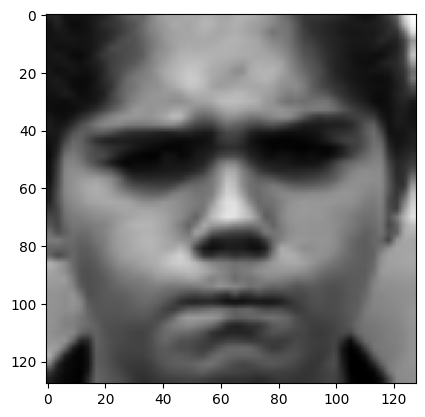

In [10]:
plt.imshow(image_list_arr[5])

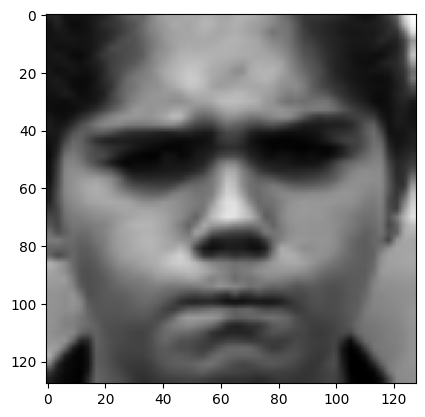

In [11]:
plt.imshow(image_list_arr[5],cmap="gray")

In [12]:
loaded_img_data = np.array(image_list_arr)
loaded_img_data

array([[[[ 24,  24,  24],
         [ 23,  23,  23],
         [ 18,  18,  18],
         ...,
         [211, 211, 211],
         [243, 243, 243],
         [248, 248, 248]],

        [[ 24,  24,  24],
         [ 23,  23,  23],
         [ 18,  18,  18],
         ...,
         [209, 209, 209],
         [242, 242, 242],
         [247, 247, 247]],

        [[ 21,  21,  21],
         [ 20,  20,  20],
         [ 16,  16,  16],
         ...,
         [196, 196, 196],
         [236, 236, 236],
         [242, 242, 242]],

        ...,

        [[231, 231, 231],
         [231, 231, 231],
         [232, 232, 232],
         ...,
         [156, 156, 156],
         [157, 157, 157],
         [157, 157, 157]],

        [[234, 234, 234],
         [234, 234, 234],
         [234, 234, 234],
         ...,
         [155, 155, 155],
         [156, 156, 156],
         [156, 156, 156]],

        [[234, 234, 234],
         [234, 234, 234],
         [234, 234, 234],
         ...,
         [155, 155, 155],
        

RGB values are usually stored as integers to save memory. But doing math on colors is usually done in float because it's easier, more powerful, and more precise. The act of converting floats to integers is called "Quantization", and it throws away precision.

Typically, RGB values are encoded as 8-bit integers, which range from 0 to 255. It's an industry standard to think of 0.0f as black and 1.0f as white (max brightness). To convert [0, 255] to [0.0f, 1.0f] all you have to do is divide by 255.0f.

If you care, this is the formula to convert back to integer: (int)floor(x * 255.0f + 0.5f). But first clamp x to [0.0f, 1.0f] if necessary.

In [13]:
loaded_img_data = loaded_img_data.astype('float32')
loaded_img_data

array([[[[ 24.,  24.,  24.],
         [ 23.,  23.,  23.],
         [ 18.,  18.,  18.],
         ...,
         [211., 211., 211.],
         [243., 243., 243.],
         [248., 248., 248.]],

        [[ 24.,  24.,  24.],
         [ 23.,  23.,  23.],
         [ 18.,  18.,  18.],
         ...,
         [209., 209., 209.],
         [242., 242., 242.],
         [247., 247., 247.]],

        [[ 21.,  21.,  21.],
         [ 20.,  20.,  20.],
         [ 16.,  16.,  16.],
         ...,
         [196., 196., 196.],
         [236., 236., 236.],
         [242., 242., 242.]],

        ...,

        [[231., 231., 231.],
         [231., 231., 231.],
         [232., 232., 232.],
         ...,
         [156., 156., 156.],
         [157., 157., 157.],
         [157., 157., 157.]],

        [[234., 234., 234.],
         [234., 234., 234.],
         [234., 234., 234.],
         ...,
         [155., 155., 155.],
         [156., 156., 156.],
         [156., 156., 156.]],

        [[234., 234., 234.],
       

In [14]:
loaded_img_data = loaded_img_data/255
loaded_img_data

array([[[[0.09411765, 0.09411765, 0.09411765],
         [0.09019608, 0.09019608, 0.09019608],
         [0.07058824, 0.07058824, 0.07058824],
         ...,
         [0.827451  , 0.827451  , 0.827451  ],
         [0.9529412 , 0.9529412 , 0.9529412 ],
         [0.972549  , 0.972549  , 0.972549  ]],

        [[0.09411765, 0.09411765, 0.09411765],
         [0.09019608, 0.09019608, 0.09019608],
         [0.07058824, 0.07058824, 0.07058824],
         ...,
         [0.81960785, 0.81960785, 0.81960785],
         [0.9490196 , 0.9490196 , 0.9490196 ],
         [0.96862745, 0.96862745, 0.96862745]],

        [[0.08235294, 0.08235294, 0.08235294],
         [0.07843138, 0.07843138, 0.07843138],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         ...,
         [0.76862746, 0.76862746, 0.76862746],
         [0.9254902 , 0.9254902 , 0.9254902 ],
         [0.9490196 , 0.9490196 , 0.9490196 ]],

        ...,

        [[0.90588236, 0.90588236, 0.90588236],
         [0.90588236, 0.90588236, 0.90588236]

In [15]:
loaded_img_data.shape

(981, 128, 128, 3)

In [16]:
loaded_img_data

array([[[[0.09411765, 0.09411765, 0.09411765],
         [0.09019608, 0.09019608, 0.09019608],
         [0.07058824, 0.07058824, 0.07058824],
         ...,
         [0.827451  , 0.827451  , 0.827451  ],
         [0.9529412 , 0.9529412 , 0.9529412 ],
         [0.972549  , 0.972549  , 0.972549  ]],

        [[0.09411765, 0.09411765, 0.09411765],
         [0.09019608, 0.09019608, 0.09019608],
         [0.07058824, 0.07058824, 0.07058824],
         ...,
         [0.81960785, 0.81960785, 0.81960785],
         [0.9490196 , 0.9490196 , 0.9490196 ],
         [0.96862745, 0.96862745, 0.96862745]],

        [[0.08235294, 0.08235294, 0.08235294],
         [0.07843138, 0.07843138, 0.07843138],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         ...,
         [0.76862746, 0.76862746, 0.76862746],
         [0.9254902 , 0.9254902 , 0.9254902 ],
         [0.9490196 , 0.9490196 , 0.9490196 ]],

        ...,

        [[0.90588236, 0.90588236, 0.90588236],
         [0.90588236, 0.90588236, 0.90588236]

In [17]:
# loaded_img_data = np.repeat(loaded_img_data[..., np.newaxis], 3, -1)


In [18]:
num_of_samples = loaded_img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177
labels[366:440]=3 #75
labels[441:647]=4 #207
labels[648:731]=5 #84
labels[732:980]=6 #249

names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]


In [19]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization


In [20]:
from tensorflow.keras.utils import to_categorical
num_classes = 7
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(loaded_img_data,Y, random_state=8)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=8)
x_test=X_test
print(y_train.shape)

# y_train = to_categorical(y_train, 3)
# y_test = to_categorical(y_test, 3)

(784, 7)


In [21]:
from keras.preprocessing.image import ImageDataGenerator

#Callbacks
c2=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

c3=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=6,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.001
)
# nClasses=3

emotion_train_gen=ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_data_emotion=emotion_train_gen.flow(X_train,y_train, batch_size=7, shuffle=True)
emotion_val_gen=ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_data_emotion=emotion_train_gen.flow(X_test,y_test, batch_size=7, shuffle=True)

In [22]:
# X_train

In [23]:
from tensorflow.keras.models import *
from sklearn.model_selection import *
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *

base_Neural_Net= ResNet50(input_shape=(128,128,3), weights='imagenet', include_top=False)
model=Sequential()
model.add(base_Neural_Net)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

for layer in base_Neural_Net.layers:
    layer.trainable = False

!pip install livelossplot

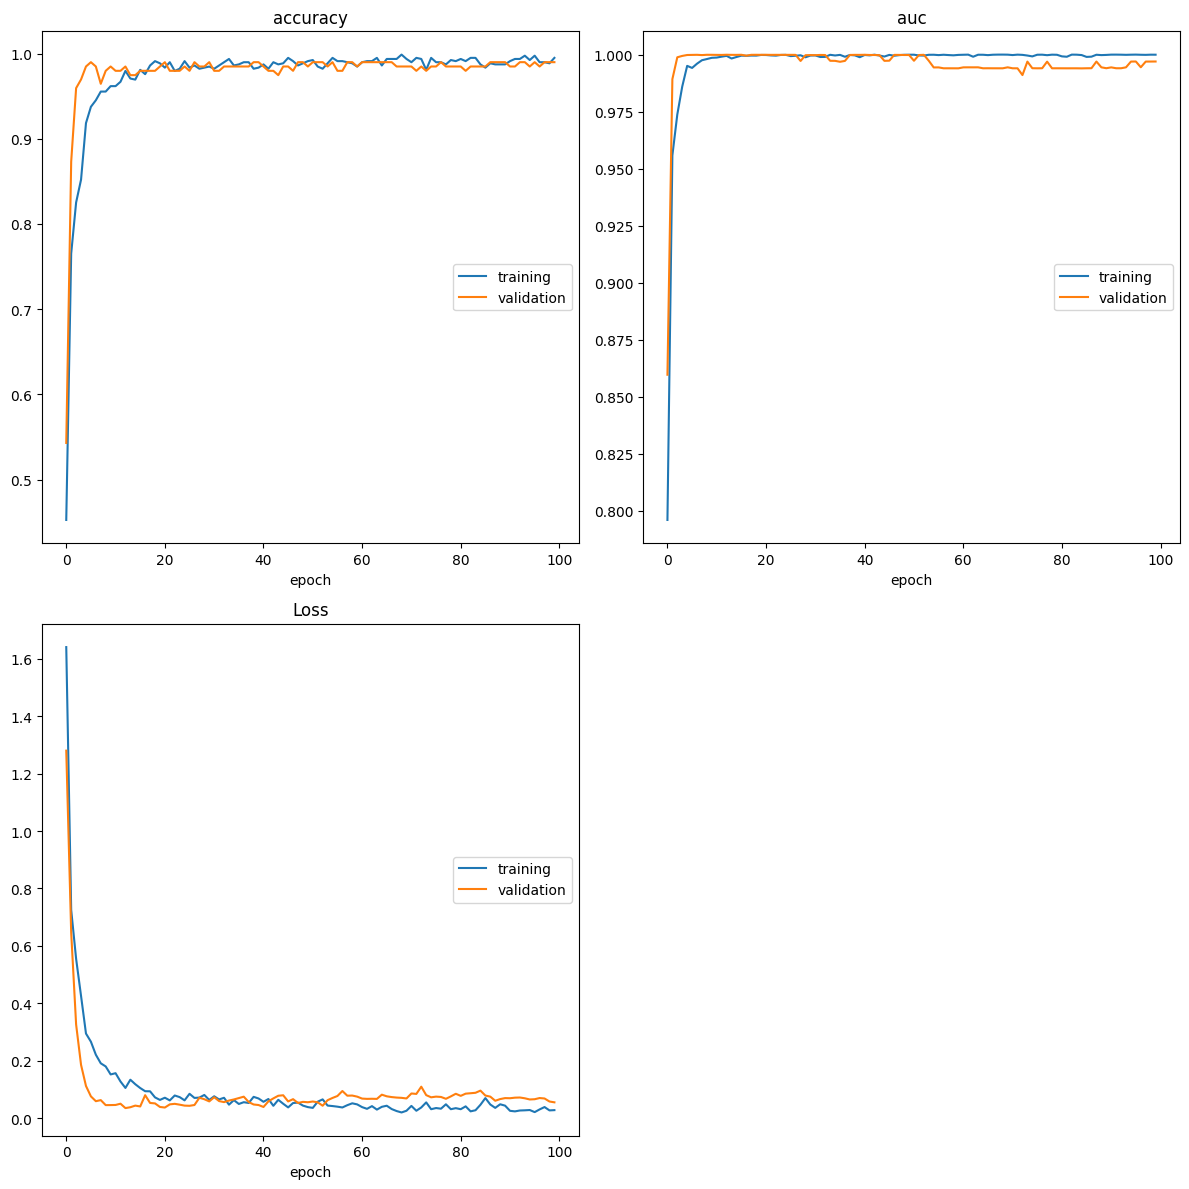

accuracy
	training         	 (min:    0.453, max:    0.999, cur:    0.995)
	validation       	 (min:    0.543, max:    0.990, cur:    0.990)
auc
	training         	 (min:    0.796, max:    1.000, cur:    1.000)
	validation       	 (min:    0.860, max:    1.000, cur:    0.997)
Loss
	training         	 (min:    0.020, max:    1.641, cur:    0.028)
	validation       	 (min:    0.035, max:    1.280, cur:    0.055)


In [24]:
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKeras

opt = Adam(lr=0.0001)
c1=PlotLossesKeras()
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy','AUC'])
history=model.fit(X_train,y_train,epochs=100,callbacks=[c1,c3],batch_size=7,validation_data=(X_test, y_test))

# from keras import callbacks
# filename='model_train_new.csv'
# filepath="C:/Users/dhruv/Desktop/SEM 2/Applied AI/Proj B/Dataset/checkpoints.hdf5"

# csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
# checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [csv_log,checkpoint]
# callbacks_list = [csv_log]
# hist = model.fit(X_train, y_train, batch_size=2, epochs=25, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

In [27]:

model.evaluate(X_test,y_test,callbacks=[c2,c3],batch_size=7)

29/29 [==============================] - 1s 17ms/step - loss: 0.0561 - accuracy: 0.9848 - auc: 0.9998


[0.05606973543763161, 0.9847715497016907, 0.9998153448104858]

In [28]:
model.save("ResNet50.h5")

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import *

models=load_model("ResNet50.h5")

In [6]:
from PIL import Image
import glob

def predictor(filename) :
    test_image = filename
    image_result = Image.open(test_image)
    # test_image = image.load_img(test_image, target_size=(100,100))
    test_image = image.load_img(test_image, target_size=(128,128,3))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    result = models.predict(test_image)
    r = np.max(result)
    per = r*100
    percentage = round(per,4)
    categories = ['anger','contempt','disgust','fear','happy','sadness','surprise']
    image_result = plt.imshow(image_result)
    output = categories[np.argmax(result)]
#     output = np.argmax(result)
    return result,percentage,output
EMOTION_DETECTOR = predictor('C:/Users/dhruv/Desktop/SEM 2/Applied AI/Proj B/Dataset/FER/test/happy/PrivateTest_3402902.jpg')
print(EMOTION_DETECTOR)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/dhruv/Desktop/SEM 2/Applied AI/Proj B/Dataset/FER/test/happy/PrivateTest_3402902.jpg'

In [3]:
from mtcnn import MTCNN
from PIL import Image
import glob
# load face detector
detector = MTCNN()


In [12]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def detect_face(img):
    
    mt_res = detector.detect_faces(img)
    return_res = []
    
    for face in mt_res:
        x, y, width, height = face['box']
        center = [x+(width/2), y+(height/2)]
        max_border = max(width, height)
        
        # center alignment
        left = max(int(center[0]-(max_border/2)), 0)
        right = max(int(center[0]+(max_border/2)), 0)
        top = max(int(center[1]-(max_border/2)), 0)
        bottom = max(int(center[1]+(max_border/2)), 0)
        
        # crop the face
        center_img_k = img[top:top+max_border, 
                           left:left+max_border, :]
        center_img = np.array(Image.fromarray(center_img_k).resize([128, 128]))
        print("center_img--------------",center_img)

        # create predictions
#         sex_preds = sex_model.predict(center_img.reshape(1,224,224,3))[0][0]
#         age_preds = age_model.predict(center_img.reshape(1,224,224,3))[0][0]

#         test_image = image.load_img(center_img.resize(128,128,3))
        test_image = image.img_to_array(center_img)
        test_image = test_image/255
        test_image = np.expand_dims(test_image, axis=0)
        emotion_preds = models.predict(test_image)
        
        # convert to grey scale then predict using the emotion model
#         grey_img = np.array(Image.fromarray(center_img_k).resize([256, 256]))
#         emotion_preds = models.predict(center_img.reshape(1,64,64, 3))
        
        # output to the cv2
        return_res.append([top, right, bottom, left, emotion_preds])
#         return_res.append([top, right, bottom, left, sex_preds, age_preds, emotion_preds])
        
    return return_res

In [13]:
# Get a reference to webcam 
video_capture = cv2.VideoCapture(0)
# print("video_capture--------------",video_capture)

emotion_dict = {
    0: 'anger',
    1: 'contempt', 
    2: 'disgust',
    3: 'fear',
    4: 'happy',
    5: 'sadness',
    6: 'surprise'
}

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()
    print("--------------",frame.shape)
    # Convert the image from BGR color (which OpenCV uses) to RGB color 
    rgb_frame = frame[:, :, ::-1]
    print("rgb_frame--------------",rgb_frame.shape)
    # Find all the faces in the current frame of video
    face_locations = detect_face(rgb_frame)
    print("face_locations--------------",face_locations)

    # Display the results
    for top, right, bottom, left, emotion_preds in face_locations:
        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        
#         sex_text = 'Female' if sex_preds > 0.5 else 'Male'
#         cv2.putText(frame, 'Sex: {}({:.3f})'.format(sex_text, sex_preds), (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)
#         cv2.putText(frame, 'Age: {:.3f}'.format(age_preds), (left, top-25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)
        cv2.putText(frame, 'Emotion: {}({:.3f})'.format(emotion_dict[np.argmax(emotion_preds)], np.max(emotion_preds)), (left, top-40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)
        
    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[ 24   9  14]
  [ 17   5   9]
  [ 16   5   9]
  ...
  [ 12   9  10]
  [ 15  12  13]
  [ 17  13  14]]

 [[ 23   9  14]
  [ 17   5   9]
  [ 16   4   8]
  ...
  [ 10   7   8]
  [ 13   9  10]
  [ 14  10  11]]

 [[ 22   8  13]
  [ 16   4   8]
  [ 15   4   8]
  ...
  [  8   5   6]
  [ 11   7   8]
  [ 12   8   9]]

 ...

 [[ 70  66  79]
  [ 63  58  71]
  [ 37  32  45]
  ...
  [160 156 157]
  [160 156 157]
  [161 157 158]]

 [[ 68  68  78]
  [ 50  48  61]
  [ 23  21  36]
  ...
  [159 155 156]
  [159 155 156]
  [158 154 155]]

 [[ 65  65  79]
  [ 37  35  53]
  [ 19  17  40]
  ...
  [157 153 154]
  [156 152 153]
  [155 151 152]]]
face_locations-------------- [[218, 486, 448, 256, array([[9.2113429e-01, 1.3723105e-04, 4.9822073e-04, 3.6858459e-04,
        7.1541630e-02, 2.0711184e-07, 6.3197580e-03]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img----------

center_img-------------- [[[195 119  88]
  [200 125  97]
  [182 103  78]
  ...
  [ 17  11  13]
  [ 19  13  15]
  [ 22  13  15]]

 [[192 121  87]
  [192 121  90]
  [178  98  73]
  ...
  [ 16  12  13]
  [ 17  13  14]
  [ 18  13  15]]

 [[187 115  83]
  [185 113  82]
  [170  88  64]
  ...
  [ 14  12  13]
  [ 15  13  15]
  [ 16  14  17]]

 ...

 [[ 66  61  83]
  [ 67  61  80]
  [ 59  52  69]
  ...
  [152 149 150]
  [153 152 152]
  [152 152 152]]

 [[ 68  62  85]
  [ 70  64  82]
  [ 66  58  74]
  ...
  [153 150 151]
  [153 152 152]
  [154 153 153]]

 [[ 72  64  87]
  [ 68  61  81]
  [ 64  56  71]
  ...
  [151 152 152]
  [152 153 153]
  [153 152 153]]]
face_locations-------------- [[195, 490, 430, 255, array([[1.8616736e-10, 2.1900676e-10, 5.5664077e-06, 4.9886704e-09,
        1.0697786e-07, 6.6121499e-14, 9.9999428e-01]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[137  66  47]
  [103  38  28]
  [ 70  19  17]
  ...
  [ 22  

center_img-------------- [[[204 131  93]
  [200 123  89]
  [170  89  60]
  ...
  [ 19  12  15]
  [ 21  13  17]
  [ 23  12  16]]

 [[203 131  92]
  [199 123  90]
  [166  87  61]
  ...
  [ 21  12  16]
  [ 22  13  17]
  [ 23  12  16]]

 [[206 131  95]
  [188 112  80]
  [147  72  47]
  ...
  [ 22  12  15]
  [ 23  13  16]
  [ 24  12  16]]

 ...

 [[ 23  19  29]
  [ 16  13  22]
  [ 14  11  21]
  ...
  [136 134 139]
  [138 134 141]
  [138 135 139]]

 [[ 39  32  49]
  [ 34  28  46]
  [ 28  23  40]
  ...
  [141 136 140]
  [142 136 139]
  [142 135 138]]

 [[ 43  36  55]
  [ 42  35  57]
  [ 37  30  51]
  ...
  [144 137 139]
  [144 134 137]
  [142 132 134]]]
face_locations-------------- [[192, 481, 416, 257, array([[1.7387262e-06, 1.0421552e-08, 4.6471449e-09, 1.1578674e-05,
        1.0584093e-06, 8.9695430e-12, 9.9998558e-01]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[218 144 116]
  [194 119  88]
  [163  85  51]
  ...
  [ 26  

center_img-------------- [[[193 117  86]
  [209 136 105]
  [162  92  59]
  ...
  [ 23   8  13]
  [ 24   9  13]
  [ 23   9  14]]

 [[190 119  87]
  [200 132 100]
  [158  88  56]
  ...
  [ 21  10  14]
  [ 23  10  14]
  [ 24  11  15]]

 [[192 120  87]
  [194 126  93]
  [151  80  51]
  ...
  [ 19  11  14]
  [ 21  12  15]
  [ 22  13  16]]

 ...

 [[ 67  63  72]
  [ 64  59  74]
  [ 59  55  75]
  ...
  [153 150 151]
  [155 152 153]
  [156 151 153]]

 [[ 68  63  81]
  [ 66  59  77]
  [ 56  48  66]
  ...
  [155 152 153]
  [155 153 154]
  [155 152 153]]

 [[ 70  65  86]
  [ 70  63  81]
  [ 61  51  68]
  ...
  [156 152 153]
  [157 154 155]
  [154 151 152]]]
face_locations-------------- [[192, 492, 428, 256, array([[4.2395359e-06, 9.6022454e-04, 2.9479185e-04, 8.1310683e-04,
        2.3553811e-03, 3.6061636e-05, 9.9553621e-01]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[196 122  92]
  [160  86  53]
  [139  64  49]
  ...
  [ 18  

center_img-------------- [[[225 141 106]
  [219 132  96]
  [178  89  54]
  ...
  [ 32   7  16]
  [ 33   8  16]
  [ 32   7  15]]

 [[222 143 110]
  [210 128  93]
  [173  87  51]
  ...
  [ 32   7  16]
  [ 33   7  16]
  [ 33   6  15]]

 [[223 149 120]
  [200 126  95]
  [168  89  55]
  ...
  [ 29   8  15]
  [ 30   7  15]
  [ 31   7  15]]

 ...

 [[ 40  35  46]
  [ 31  26  40]
  [ 25  20  35]
  ...
  [133 126 130]
  [137 131 134]
  [141 135 138]]

 [[ 49  41  56]
  [ 44  36  54]
  [ 38  29  48]
  ...
  [138 131 134]
  [147 139 142]
  [147 140 143]]

 [[ 51  44  61]
  [ 46  39  56]
  [ 44  39  54]
  ...
  [145 141 142]
  [152 146 148]
  [152 146 148]]]
face_locations-------------- [[181, 495, 418, 258, array([[3.0203721e-06, 8.4802922e-04, 2.4243741e-04, 3.1516507e-02,
        5.4159474e-01, 6.9751786e-06, 4.2578831e-01]], dtype=float32)]]
-------------- (480, 640, 3)
rgb_frame-------------- (480, 640, 3)
center_img-------------- [[[204 127 103]
  [225 147 111]
  [186 104  65]
  ...
  [ 25  

In [40]:
models=load_model("newiv3.h5")

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predict_x=models.predict(X_test) 
results=np.argmax(predict_x,axis=1)

# results = models.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)
# cm = cm.astype(np.float) / cm.sum(axis=1)[:, np.newaxis]

label_mapdisgust = ['anger','contempt','disgust','fear','happy','sadness','surprise']
#['anger','contempt','disgust','fear','happy','sadness','surprise']
import seaborn as sns
import pandas as pd
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )
final_cm = cm_df

# y_pred8=model.predict_classes(x_test)
y_test8=[np.argmax(x) for x in y_test]
print('\t\tClassification Report For CK/InceptionV3-NoAug:\n', classification_report(y_test8, results,target_names=label_mapdisgust))


		Classification Report For CK/InceptionV3-NoAug:
               precision    recall  f1-score   support

       anger       1.00      1.00      1.00        29
    contempt       0.84      1.00      0.91        16
     disgust       1.00      0.95      0.97        39
        fear       1.00      1.00      1.00        17
       happy       1.00      1.00      1.00        35
     sadness       1.00      0.93      0.96        14
    surprise       1.00      1.00      1.00        47

    accuracy                           0.98       197
   macro avg       0.98      0.98      0.98       197
weighted avg       0.99      0.98      0.99       197



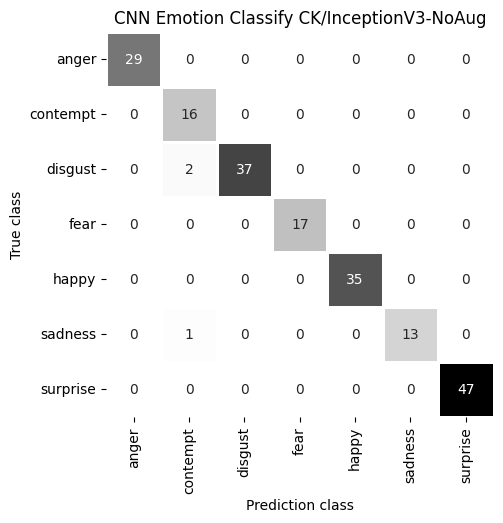

In [44]:
plt.figure(figsize = (5,5))
sns.heatmap(final_cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify CK/InceptionV3-NoAug')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()